In [1]:
%run pylib/blazar_id
self = Blazars()
# self.observation()


# Blazar studies: 
Read in "files/classification.pkl" with 6491 source entries.

<h5 style="text-align:right; margin-right:15px"> 2023-07-15 06:51</h5>

## Blazar latitudes

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f9c842fdab0>
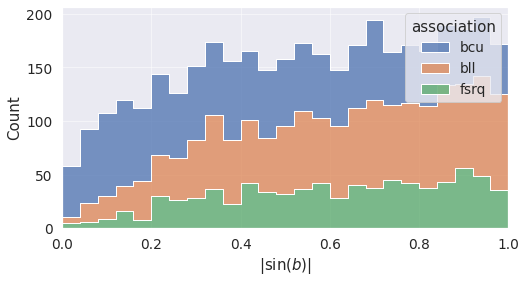

In [2]:
def observation(self,  hue='association', b=0.16, c=5):
    show(f"""## Blazar latitudes""")
    fig, ax =plt.subplots(figsize=(8,4))
    ax.set(xlabel=r'$|\sin(b)|$', xlim=(0,1))
    sns.histplot(self.df.set_index('association').loc['bcu bll fsrq'.split()], 
                 hue=hue, multiple='stack', ax=ax, 
                  x='abs_sin_b', bins=np.linspace(0.,1,26), element='step')
    leg = ax.get_legend();# leg(loc='upper left')

    # be = BlazarEff(b,c)
    # x = np.linspace(0,1,)
    # norm =  be(1)/180 #be(1)
    # ax.plot(x, be(x)/norm, lw=2, ls='--', color='red');
    show(fig, caption=f"""
         Stacked histogram of absolute blazar galactic latitudes, according 
         to the classification type of the associated blazar. 
         """)

observation(self)

In [ ]:

# fig, ax = plt.subplots()
# sns.ecdfplot(self.df.set_index('association').loc['bcu bll fsrq'.split()],# hue='association',
#              ax=ax, x='abs_sin_b')
# ax.plot([0,1],[0,1], '--', color='0.5');
# show(fig)

# class BlazarEff:
#     def __init__(self, b=0.31, c=5, integral=False):
#         self.__dict__.update(b=b, c=c, int=integral)

#     def __call__(self,x):
#         b,c = self.b, self.c
#         return  b*(1-c* np.exp(-c*x))  - b*(1-c) if not self.int else \
#             x+self.b*(x-1+np.exp(-self.c*x)) 

# be = BlazarEff()
# x = np.linspace(0,1,)
# norm =  1 #be(1)
# plt.plot(x, be(x)/norm);
# plt.axhline(1, ls='--');

# dfb  = self.df.set_index('association').loc[['bll','fsrq','bcu']]
# fig, ax = plt.subplots(figsize=(8,8))
# ax.set(xlim=(0,1))
# sns.ecdfplot(self.df.set_index('association').loc[['bll','fsrq', 'bcu']], 
#                   x='abs_sin_b',ax=ax)
# b,c = 0.16,5
# # f = lambda x: x*(b+1) - b*(1- np.exp(-c*x))
# f = BlazarEff(b,c, integral=True)
# x = np.linspace(0,1,100)
# ax.plot(x, f(x), 'r--');
# show(fig, 
#     caption='Cumulative distribution for all blazars'
#     )

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f9c841629b0>
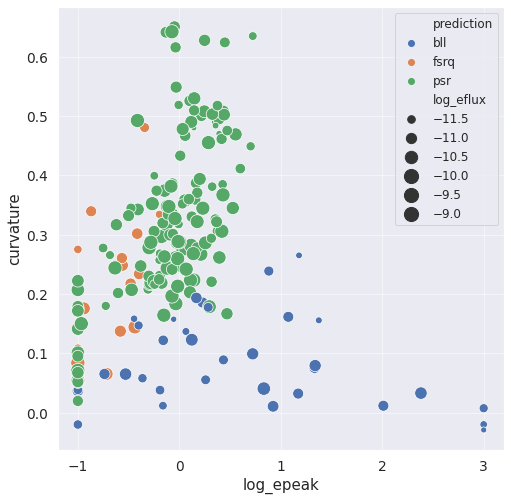

In [6]:
target_names = 'bll fsrq psr'.split()

def show_curv_epeak(dfq):

    # show(f"""## What about the  {len(dfq)} SGU sources?""")


    fig, ax = plt.subplots(figsize=(8,8))
    sns.scatterplot(dfq, x='log_epeak', y='curvature', 
                    hue_order=target_names, hue='prediction',
                    size='log_eflux', sizes=(10,200),size_norm=(-12,-10),
                    ax=ax )
    ax.set(xticks = [-1,0,1,2,3], )
    ax.legend(loc='upper right', fontsize=12);
    show(fig)
    return 


show_curv_epeak(self.df.set_index('association').loc[target_names].query('abs_sin_b<0.1'))

Unid low-latitude distributions

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f9c84162e90>
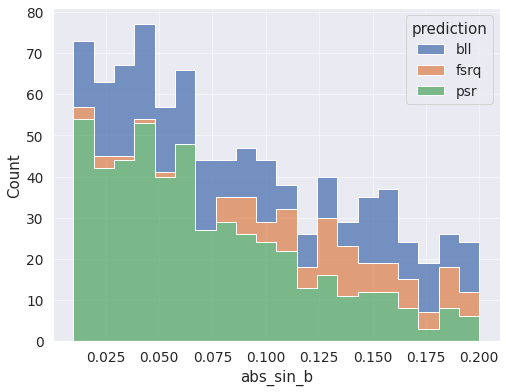

Notes:
* 

In [7]:
show(f"""Unid low-latitude distributions
""")
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(ax=ax, data=self.df.set_index('association').loc['unid'],x='abs_sin_b', 
              bins=np.linspace(0.01,0.2,21), element='step',
             hue='prediction', multiple='stack')
show(fig)
show(f"""Notes:
* 
""")


## Detected pulsar distributions

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f9c84133490>
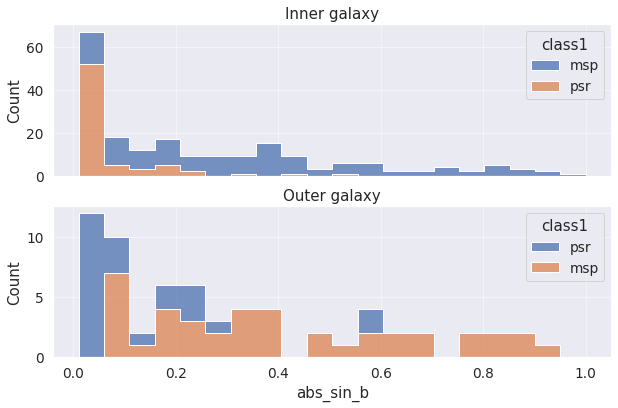

In [9]:
df = self.df.copy()
df['hemisphere'] = df.glon.apply(
    lambda glon: 'Inner' if (glon<90) | (glon>270) else 'Outer')
df['pred_type'] = df.prediction.apply(lambda x: 'Pulsar' if x=='psr' else 'Blazar') 

def actual_type(a):
    if a=='psr':  return 'Pulsar'
    if a in 'bcu bll fsrq'.split(): return 'Blazar'
    return 'other'

df['actual_type'] = df.association.apply( actual_type)

### Associated sources according to basic source type and hemisphere 

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f9c8219cc40>
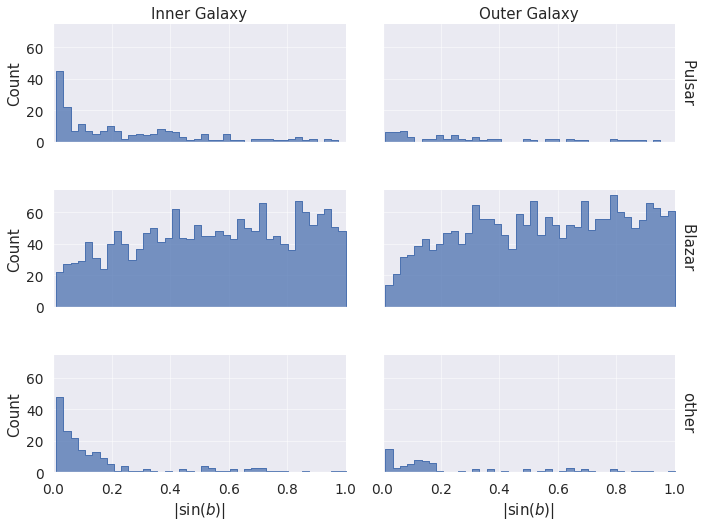

### Unids according to predicted type and hemisphere

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f9c816a3130>
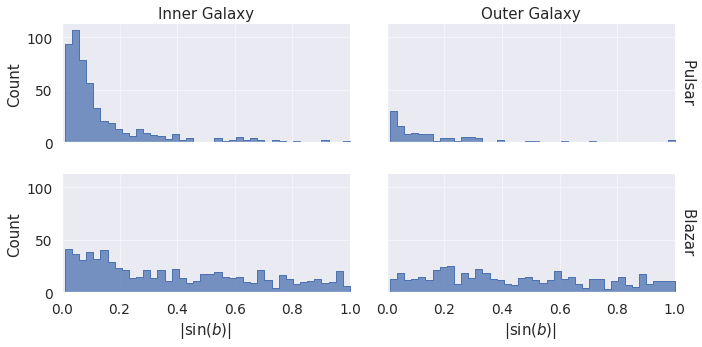

In [24]:
def sinbplots(data, row, row_order, bins=np.linspace(0.01,1,41)):
    (sns.FacetGrid(data,  row=row, row_order=row_order,
                   col='hemisphere',  col_order=['Inner', 'Outer'],
                   aspect=2, height=2.5,margin_titles=True,
                   gridspec_kws=dict(hspace=None),
                  subplot_kws=dict( xlim=(0,1)))
     .map_dataframe(sns.histplot, x='abs_sin_b',  bins=bins,element='step')
     .set_titles(row_template='{row_name} ', col_template='{col_name} Galaxy')
     .set_xlabels(r'$|\sin(b)|$')
    )
    show(plt.gcf())

show(f"""### Associated sources according to basic source type and hemisphere """)
sinbplots(df.query('association!="unid"'), 'actual_type', 
         row_order='Pulsar Blazar other'.split())

show(f"""### Unids according to predicted type and hemisphere""")
sinbplots(df.query('association=="unid"'), 'pred_type', 'Pulsar Blazar'.split())


In [11]:
show(f""" ## Look at the ridge """)
ridge = df.query('abs_sin_b<0.01')
def show_counts(x):
    x.name='counts'; show(x)
show_counts(ridge.groupby('class1').size())
show_counts(ridge.query('association=="unid"').groupby('prediction').size())

## Look at the ridge 

class1,GC,HMB,MSP,PSR,bcu,fsrq,glc,psr,pwn,snr,spp,unk
counts,1,2,1,44,13,2,2,1,2,9,38,30


prediction,bll,fsrq,psr
counts,22,10,138


In [ ]:
sns.FacetGrid

In [13]:
stype = self.df.groupby('association').size()
stype.name='All sources'
show(stype)
show(f"""Ratio of observed fsrq/bll: {stype.fsrq/stype.bll:.2f}""")

bcu_pred = self.df.set_index('association').loc['bcu'].groupby('prediction').size()
bcu_pred.name='bcu'
show(bcu_pred)
show(f"""For bcu, the ratio of predicted fsrq/bll: {bcu_pred.fsrq/bcu_pred.bll:.2f} """)

association,bcu,bll,fsrq,other,psr,unid
All sources,1554,1463,790,346,312,2026


Ratio of observed fsrq/bll: 0.54

prediction,bll,fsrq,psr
bcu,1011,459,84


For bcu, the ratio of predicted fsrq/bll: 0.45 